In [1]:
from func import *
import matplotlib.pyplot as plt
from tensorflow import summary as sm
from tensorflow import keras
from keras import models, layers, optimizers
from keras.callbacks import ModelCheckpoint
import datetime
import os
from keras.layers import BatchNormalization,Dropout

In [ ]:
# gpus = tf.config.experimental.list_physical_devices('GPU')
# if gpus:
#   # 텐서플로가 첫 번째 GPU에 1GB 메모리만 할당하도록 제한
#   try:
#     tf.config.experimental.set_virtual_device_configuration(
#         gpus[0],
#         [tf.config.experimental.VirtualDeviceConfiguration(memory_limit=8240)])
#   except RuntimeError as e:
#     # 프로그램 시작시에 가상 장치가 설정되어야만 합니다
#     print(e)


In [ ]:
VERSION = 'propecer'

FILE_01 = 'DST_80.csv'
FILE_00 = 'FUDS_80.csv'
FILE_02 = 'US06_80.csv'
drop_labels_x = ['Data_Point', 'Test_Time(s)', 'Date_Time', 'Step_Time(s)', 'Step_Index', 'Cycle_Index', 'Charge_Capacity(Ah)', 'Discharge_Capacity(Ah)', 'Charge_Energy(Wh)'\
                 , 'Discharge_Energy(Wh)', 'AC_Impedance(Ohm)','SoC(%)','dV/dt(V/s)','ACI_Phase_Angle(Deg)',]
drop_labels_y = ['Data_Point', 'Test_Time(s)', 'Date_Time', 'Step_Time(s)', 'Step_Index', 'Cycle_Index', 'Charge_Capacity(Ah)', 'Current(A)', 'Discharge_Capacity(Ah)', 'Charge_Energy(Wh)', \
                 'Discharge_Energy(Wh)', 'dV/dt(V/s)', 'AC_Impedance(Ohm)','ACI_Phase_Angle(Deg)','Voltage(V)','Have_Capacity(Ah)']

param = {'seq_len' : 300, 'num_units' : 150, 'num_units2' : 16, 'num_filters' : 128, 'window' : 5, 'dropout': 0.2, 'num_epochs' : 2000, 'num_dense': 80, 'batch':1024}
Fsize=3

log_dir = f"logs/{VERSION}/" + datetime.datetime.now().strftime("%Y%m%d-%H%M") + f'-{param["num_epochs"]}'
file_path = f'weight\{VERSION}\SOH_Checkpoint\{param["num_epochs"]}\{datetime.datetime.now().strftime("%Y%m%d-%H%M%S")}.h5'
hist_freq = 250

save_path = f'picture\{VERSION}\{Fsize}\{param["num_epochs"]}EP'
try:
    if not os.path.exists(save_path):
        os.makedirs(save_path)
except OSError:
    print('Error Creating Directory...')

Index(['Voltage(V)', 'Have_Capacity(Ah)'], dtype='object')
Index(['SoC(%)'], dtype='object')
Index(['Voltage(V)', 'Have_Capacity(Ah)'], dtype='object')
Index(['SoC(%)'], dtype='object')
Index(['Voltage(V)', 'Have_Capacity(Ah)'], dtype='object')
Index(['SoC(%)'], dtype='object')
data00 = (11077, 2)


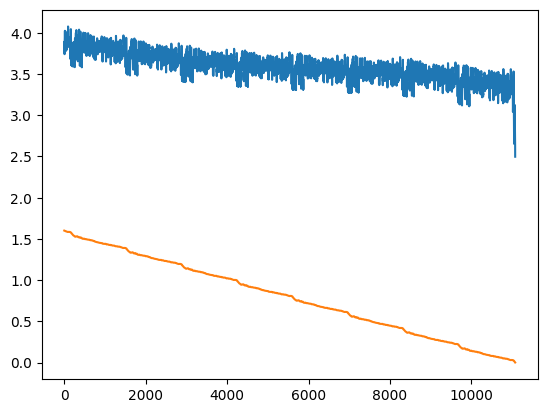

data01 = (10625, 2)


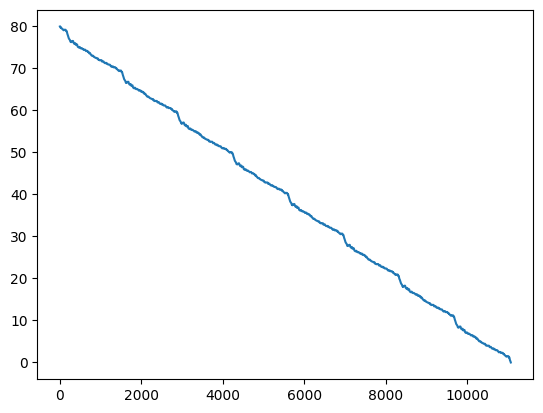

data02 = (10625, 2)


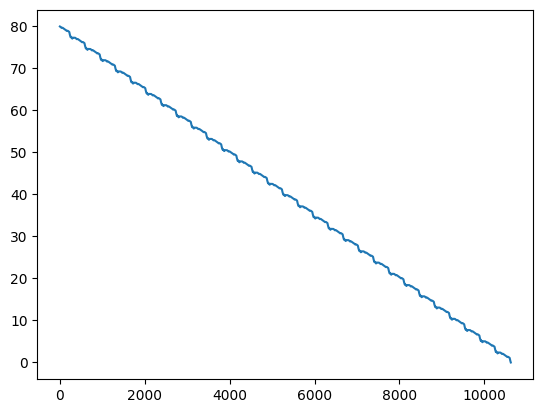

In [ ]:
data00, data_cap00 = get_data(FILE_00, drop_labels_x, drop_labels_y)
data01, data_cap01 = get_data(FILE_01, drop_labels_x, drop_labels_y)
data_test, data_cap_test = get_data(FILE_02, drop_labels_x, drop_labels_y)
#FUDS
A1 = data00[2604:]
A2 = data_cap00[2604:]
#DST
B1 = data01[1933:]
B2 = data_cap01[1933:]
#US06
C1 = data_test[1271:]
C2 = data_cap_test[1271:]

data00 = A1 
data_cap00 = A2
data01 = B1
data_cap01 = B2
data_test = B1
data_cap_test = B2


print(f'data00 = {data00.shape}')
pl.plot(data00)
pl.show()
print(f'data01 = {data01.shape}')
pl.plot(data_cap00)
pl.show()
print(f'data02 = {data_test.shape}')
pl.plot(data_cap_test)
pl.show()
savedata00 =  data00
savedata_cap00 =  data_cap00
savedata01 =  data01
savedata_cap01 =  data_cap01
savedata_test = data_test
savedata_cap_test = data_cap_test

In [ ]:
#1/n 필터
data00 = lowpass1(data00, Fsize)[Fsize:]
data_cap00 = lowpass1(data_cap00,Fsize)[Fsize:]
data01 = lowpass1(data01,Fsize)[Fsize:]
data_cap01 = lowpass1(data_cap01,Fsize)[Fsize:]
data_test = lowpass1(data_test,Fsize)[Fsize:]
data_cap_test = lowpass1(data_cap_test,Fsize)[Fsize:]

size=(int)(savedata00.shape[0]-Fsize/2)
size1=(int)(savedata01.shape[0]-Fsize/2)
size2=(int)(savedata_test.shape[0]-Fsize/2)
Edata00 =  savedata00[Fsize:size]-data00
Edata_cap00 =  savedata_cap00[Fsize:size]-data_cap00
Edata01 =  savedata01[Fsize:size1]-data01
Edata_cap01 =  savedata_cap01[Fsize:size1]-data_cap01
Edata_test = savedata_test[Fsize:size2]-data_test
Edata_cap_test = savedata_cap_test[Fsize:size2]-data_cap_test


In [ ]:
# #1/n 필터 뒤
# data00 = lowpass(data00, Fsize)[Fsize:]
# data_cap00 = lowpass(data_cap00,Fsize)[Fsize:]
# data01 = lowpass(data01,Fsize)[Fsize:]
# data_cap01 = lowpass(data_cap01,Fsize)[Fsize:]
# data_test = lowpass(data_test,Fsize)[Fsize:]
# data_cap_test = lowpass(data_cap_test,Fsize)[Fsize:]

# Edata00 =  savedata00[Fsize:]-data00
# Edata_cap00 =  savedata_cap00[Fsize:]-data_cap00
# Edata01 =  savedata01[Fsize:]-data01
# Edata_cap01 =  savedata_cap01[Fsize:]-data_cap01
# Edata_test = savedata_test[Fsize:]-data_test
# Edata_cap_test = savedata_cap_test[Fsize:]-data_cap_test
# print(f'data00 = {data00.shape}')
# print(f'Edata00 = {Edata00.shape}')
# pl.plot(Edata_test)
# pl.show()


In [ ]:
# #3 필터계수 (0.25 0.5 0.25)
# data00 = lowpass2(data00 )[1:]
# data_cap00 = lowpass2(data_cap00)[1:]
# data01 = lowpass2(data01)[1:]
# data_cap01 = lowpass2(data_cap01)[1:]
# data_test = lowpass2(data_test)[1:]
# data_cap_test = lowpass2(data_cap_test)[1:]

# size=(int)(savedata00.shape[0])
# Edata00 =  savedata00[1:size-1]-data00
# Edata_cap00 =  savedata_cap00[1:size-1]-data_cap00
# Edata01 =  savedata01[1:size-1]-data01
# Edata_cap01 =  savedata_cap01[1:size-1]-data_cap01
# Edata_test = savedata_test[1:size-1]-data_test
# Edata_cap_test = savedata_cap_test[1:size-1]-data_cap_test
# print(f'data00 = {data00.shape}')
# print(f'Edata00 = {Edata00.shape}')
# pl.plot(Edata_test)
# pl.show()

In [ ]:
# #5 필터계수 (-0.125 0.25 0.75 0.25 -0.125)
# data00 = lowpass3(data00)[2:]
# data_cap00 = lowpass3(data_cap00)[2:]
# data01 = lowpass3(data01)[2:]
# data_cap01 = lowpass3(data_cap01)[2:]
# data_test = lowpass3(data_test)[2:]
# data_cap_test = lowpass3(data_cap_test)[2:]
# print(f'data00 = {data00.shape}')
# size=(int)(savedata00.shape[0])
# Edata00 =  savedata00[2:size-2]-data00
# Edata_cap00 =  savedata_cap00[2:size-2]-data_cap00
# Edata01 =  savedata01[2:size-2]-data01
# Edata_cap01 =  savedata_cap01[2:size-2]-data_cap01
# Edata_test = savedata_test[2:size-2]-data_test
# Edata_cap_test = savedata_cap_test[2:size-2]-data_cap_test

# print(f'Edata00 = {Edata00.shape}')
# pl.plot(Edata_test)
# pl.show()

In [ ]:
# pl.figure(dpi=2500)
# pl.ylabel('Voltage')
# pl.xlabel('Time(s)')
# line = pl.plot(savedata_cap_test, label = 'Voltage Real')
# pl.setp(line, linewidth=0.3)

# y_line = pl.plot(data_cap_test, label = 'Voltage Low')
# # y_line = pl.plot(y_graph, label = 'Voltage Reference')
# pl.setp(y_line, linewidth=0.3)
# pl.legend()
# pl.savefig(f'{save_path}\Estimation.png')
# pl.show()

In [ ]:
x_train00 = seq_gen_x(data00, param['seq_len'])
y_train00 = seq_gen_y(data_cap00, param['seq_len'])
x_train01 = seq_gen_x(data01, param['seq_len'])
y_train01 = seq_gen_y(data_cap01, param['seq_len'])
x_test = seq_gen_x(data_test, param['seq_len'])
y_test = seq_gen_y(data_cap_test, param['seq_len'])

plus=0

Ex_train00 = seq_gen_x(Edata00, param['seq_len'])+plus
Ey_train00 = seq_gen_y(Edata_cap00, param['seq_len'])+plus
Ex_train01 = seq_gen_x(Edata01, param['seq_len'])+plus
Ey_train01 = seq_gen_y(Edata_cap01, param['seq_len'])+plus
Ex_test = seq_gen_x(Edata_test, param['seq_len'])+plus
Ey_test = seq_gen_y(Edata_cap_test, param['seq_len'])+plus
print(x_train00.shape)
print(y_test.shape)
print(x_train00[0, 0:6, 1])
count=savedata_cap_test.shape[0]-y_test.shape[0]*y_test.shape[1]
print(count)

(10771, 300, 2)
(10319, 1)
[1.5993232 1.598762  1.5983151 1.5979342 1.5975106 1.597038 ]
306


In [ ]:
from keras.optimizers import SGD
import tensorflow as tf
CosineAnnealing = tf.keras.optimizers.schedules.CosineDecay(1e-1, param['num_epochs'], 0.2) # 0.1
sgd=SGD(CosineAnnealing, momentum = 0.9)
# sgd=set_optimizer('SGD', 0.1, 2000)
# opt = keras.optimizers.Adamax(clipvalue=1.0,lr=0.001)

In [ ]:

# sgd=set_optimizer('SGD', 0.1, 2000)
opt = keras.optimizers.Adamax(clipvalue=1.0,lr=0.001)

c:\Users\han\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\optimizers\optimizer_v2\adamax.py:95: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adamax, self).__init__(name, **kwargs)


In [ ]:
# model = models.Sequential()
# # model.add(layers.Conv1D(param['num_filters'], param['window'], padding='causal', input_shape = (None, x_train00.shape[-1])))
# model.add(layers.GRU(param['num_units'], return_sequences = True, input_shape = (None, x_train00.shape[-1])))
# # model.add(BatchNormalization())
# model.add(layers.SimpleRNN(param['num_dense']))
# # model.add(BatchNormalization())
# model.add(layers.Dense(1))
# model.compile(loss = 'mse', optimizer = opt) 
# model.summary()

In [ ]:
model = models.Sequential()
# model.add(layers.Conv1D(param['num_filters'], param['window'], padding='causal', input_shape = (None, x_train00.shape[-1])))
model.add(layers.GRU(param['num_units'], return_sequences = True, input_shape = (None, x_train00.shape[-1])))
# model.add(BatchNormalization())
model.add(layers.SimpleRNN(param['num_dense']))
# model.add(BatchNormalization())
model.add(layers.Dense(1))
model.compile(loss = 'mse', optimizer = opt) 
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, None, 150)         69300     
                                                                 
 simple_rnn (SimpleRNN)      (None, 80)                18480     
                                                                 
 dense (Dense)               (None, 1)                 81        
                                                                 
Total params: 87,861
Trainable params: 87,861
Non-trainable params: 0
_________________________________________________________________


In [ ]:
callback_list = [ModelCheckpoint(filepath = file_path, monitor = 'val_loss', save_best_only = True)]
fitdata = model.fit(x_train00, y_train00, epochs=param['num_epochs'], verbose = 0, validation_split=0.01, callbacks=callback_list,batch_size=param['batch'])
callback_list = [ModelCheckpoint(filepath = file_path, monitor = 'val_loss', save_best_only = True)]
fitdata = model.fit(x_train01, y_train01, epochs=param['num_epochs'], verbose = 0, validation_split=0.01, callbacks=callback_list,batch_size=param['batch'])

In [ ]:
model.load_weights(file_path)
prediction = model.predict(x_test)

Lowprediction=prediction

323/323 [==============================] - 14s 43ms/step


In [ ]:
model = models.Sequential()
# model.add(layers.Conv1D(param['num_filters'], param['window'], padding='causal', input_shape = (None, x_train00.shape[-1])))
model.add(layers.GRU(param['num_units'], return_sequences = True, input_shape = (None, x_train00.shape[-1])))
# model.add(BatchNormalization())
model.add(layers.SimpleRNN(param['num_dense']))
# model.add(BatchNormalization())
model.add(layers.Dense(1))
model.compile(loss = 'mse', optimizer = opt) 
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_1 (GRU)                 (None, None, 150)         69300     
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 80)                18480     
                                                                 
 dense_1 (Dense)             (None, 1)                 81        
                                                                 
Total params: 87,861
Trainable params: 87,861
Non-trainable params: 0
_________________________________________________________________


In [ ]:
callback_list = [ModelCheckpoint(filepath = file_path, monitor = 'val_loss', save_best_only = True)]
fitdata = model.fit(Ex_train00, Ey_train00, epochs=param['num_epochs'], verbose = 1, validation_split=0.01, callbacks=callback_list,batch_size=param['batch'])
callback_list = [ModelCheckpoint(filepath = file_path, monitor = 'val_loss', save_best_only = True)]
fitdata = model.fit(Ex_train01, Ey_train01, epochs=param['num_epochs'], verbose = 1, validation_split=0.01, callbacks=callback_list,batch_size=param['batch'])

Epoch 1/2000
11/11 [==============================] - 6s 390ms/step - loss: 2.7752e-04 - val_loss: 5.9766e-05
Epoch 2/2000
11/11 [==============================] - 4s 357ms/step - loss: 4.4782e-05 - val_loss: 5.1568e-05
Epoch 3/2000
11/11 [==============================] - 4s 360ms/step - loss: 2.1218e-05 - val_loss: 2.2787e-05
Epoch 4/2000
11/11 [==============================] - 4s 365ms/step - loss: 1.2108e-05 - val_loss: 1.7848e-05
Epoch 5/2000
11/11 [==============================] - 4s 352ms/step - loss: 8.3510e-06 - val_loss: 1.2112e-05
Epoch 6/2000
11/11 [==============================] - 4s 362ms/step - loss: 6.3228e-06 - val_loss: 9.8631e-06
Epoch 7/2000
11/11 [==============================] - 4s 347ms/step - loss: 5.2140e-06 - val_loss: 8.4294e-06
Epoch 8/2000
11/11 [==============================] - 4s 358ms/step - loss: 4.4393e-06 - val_loss: 7.4790e-06
Epoch 9/2000
11/11 [==============================] - 4s 354ms/step - loss: 3.9175e-06 - val_loss: 6.7906e-06
Epoch 10/2

In [ ]:
from calendar import EPOCH

model.load_weights(file_path)
prediction = model.predict(Ex_test)
Realprediction=Lowprediction + prediction
y_graph = savedata_cap_test
prediction_graph = flatten_2Dto1D(Realprediction)
print(prediction_graph.shape)
print(y_graph.shape)
    

print(save_path)

323/323 [==============================] - 14s 44ms/step
(10319, 1)
(10625, 1)
picture\propecer\3\2000EP


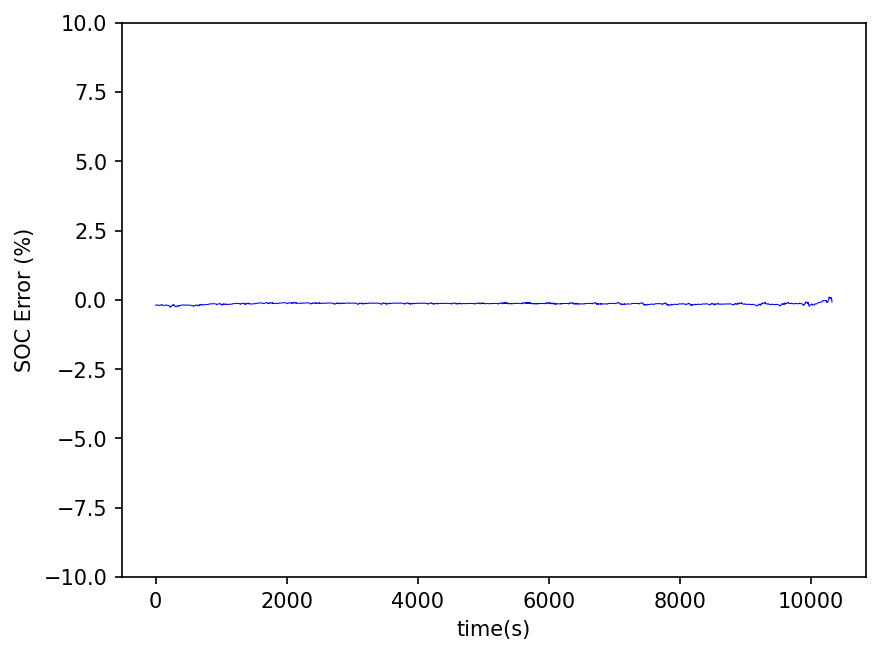

RMSE(0.001417), MAE(0.001390)


In [ ]:
Error_rate = []
Error = []
y_graph = y_test
for step in range(len(prediction_graph)):
        # Error_rate.append((prediction_graph[step] - savedata_cap_test[step]) / savedata_cap_test[step] * 100)
        Error_rate.append((prediction_graph[step] - y_graph[step]) )
        Error.append(Error_rate[step] / 100)
    
RMSE_total = np.sqrt(np.mean(np.square(Error)))
MAE_total = np.mean(np.absolute(Error))
pl.figure(dpi=150)
line = pl.plot(Error_rate)
pl.ylim(-10, 10)
pl.ylabel('SOC Error (%)')
pl.xlabel('time(s)')
pl.setp(line, color='b', linewidth=0.5)
EP=param['num_epochs']
pl.savefig(f'{save_path}\{Fsize}RMSE{RMSE_total:.6f}MAE{MAE_total:.6f}.png')
pl.show()
print(f'RMSE({RMSE_total:.6f}), MAE({MAE_total:.6f})')


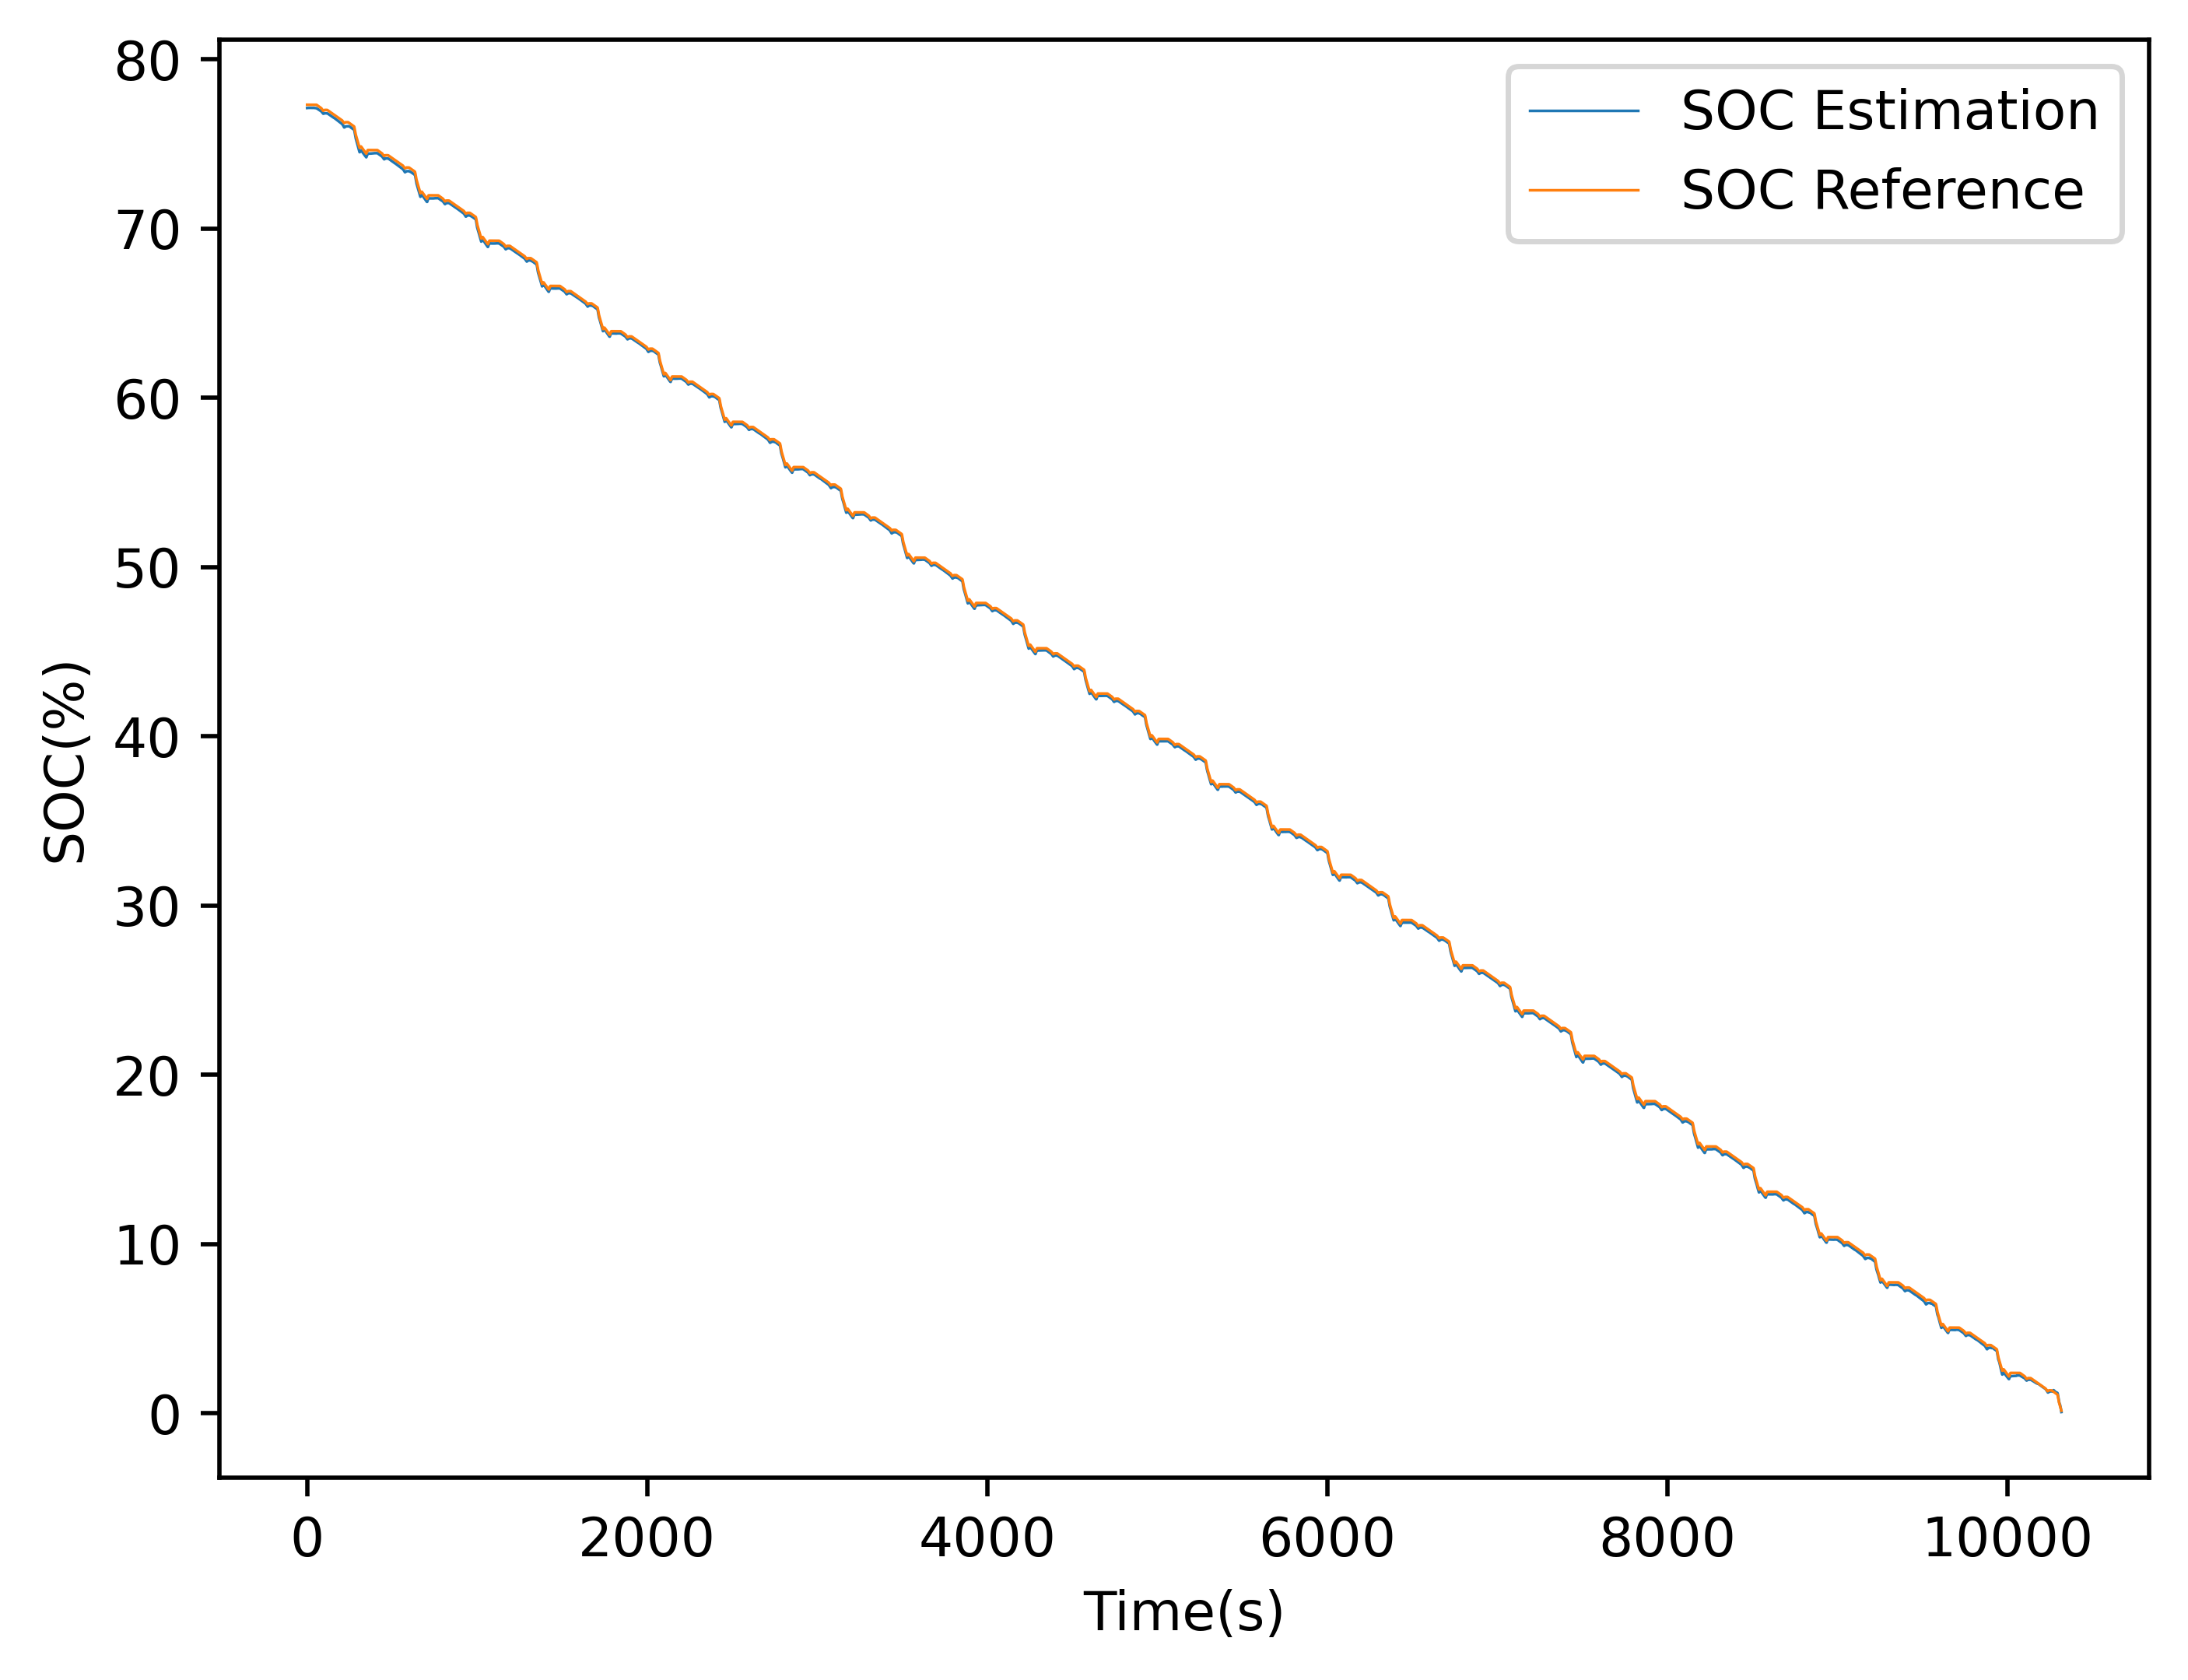

(10319, 1)
(10319, 1)


In [ ]:
pl.figure(dpi=500)
pl.ylabel('SOC(%)')
pl.xlabel('Time(s)')
line = pl.plot(prediction_graph, label = 'SOC Estimation')
pl.setp(line, linewidth=0.5)

y_line = pl.plot(y_graph, label = 'SOC Reference')
# y_line = pl.plot(y_graph, label = 'Voltage Reference')
pl.setp(y_line, linewidth=0.5)
pl.legend()
pl.savefig(f'{save_path}\{datetime.datetime.now().strftime("%Y%m%d-%H%M%S")}.png')
pl.show()
print(prediction_graph.shape)
print(y_graph.shape)

In [ ]:
# model = models.Sequential()
# # model.add(layers.Conv1D(param['num_filters'], param['window'], padding='causal', input_shape = (None, x_train00.shape[-1])))
# model.add(layers.LSTM(param['num_units'], return_sequences = True, input_shape = (None, x_train00.shape[-1])))
# # BatchNormalization()
# model.add(layers.LSTM(16))
# # BatchNormalization()
# model.add(layers.Dense(param['num_dense']))
# # BatchNormalization()
# model.add(layers.Dense(1))
# model.compile(loss = 'mse', optimizer = 'Adam') 
# model.summary()

# model2 = models.Sequential()
# # model.add(layers.Conv1D(param['num_filters'], param['window'], padding='causal', input_shape = (None, x_train00.shape[-1])))
# model2.add(layers.LSTM(param['num_units'], return_sequences = True, input_shape = (None, x_train00.shape[-1])))
# # BatchNormalization()
# model2.add(layers.LSTM(16))
# # BatchNormalization()
# model2.add(layers.Dense(param['num_dense']))
# # BatchNormalization()
# model2.add(layers.Dense(1))
# model2.compile(loss = 'mse', optimizer = 'Adam') 
# model2.summary()
# EP=0
# for i in range(0,25):
#     EP=EP+param["num_epochs"]
#     callback_list = [ModelCheckpoint(filepath = file_path, monitor = 'val_loss', save_best_only = True),
#                  TensorBoard(log_dir=log_dir, histogram_freq=hist_freq)]
#     fitdata = model.fit(x_train00, y_train00, epochs=EP, verbose = 0, validation_split = 0.2, callbacks=callback_list,batch_size=param['batch'])
#     callback_list = [ModelCheckpoint(filepath = file_path, monitor = 'val_loss', save_best_only = True),
#                  TensorBoard(log_dir=log_dir, histogram_freq=hist_freq)]
#     fitdata = model.fit(x_train01, y_train01, epochs=EP, verbose = 0, validation_split = 0.2, callbacks=callback_list,batch_size=param['batch'])
    
#     model.load_weights(file_path)
#     prediction = model.predict(x_test)

#     Lowprediction=prediction
    
#     callback_list = [ModelCheckpoint(filepath = file_path, monitor = 'val_loss', save_best_only = True),
#                       TensorBoard(log_dir=log_dir, histogram_freq=hist_freq)]
#     fitdata = model2.fit(Ex_train00, Ey_train00, epochs=EP, verbose = 0, validation_split = 0.2, callbacks=callback_list,batch_size=param['batch'])
#     callback_list = [ModelCheckpoint(filepath = file_path, monitor = 'val_loss', save_best_only = True),
#                      TensorBoard(log_dir=log_dir, histogram_freq=hist_freq)]
#     fitdata = model2.fit(Ex_train01, Ey_train01, epochs=EP, verbose = 0, validation_split = 0.2, callbacks=callback_list,batch_size=param['batch'])

#     from calendar import EPOCH

#     model.load_weights(file_path)
#     prediction = model.predict(Ex_test)
#     Realprediction=Lowprediction + prediction-plus
#     y_graph = y_test
#     prediction_graph = flatten_2Dto1D(Realprediction)

#     Error_rate = []
#     Error = []

#     for step in range(len(prediction_graph)):
#          # Error_rate.append((prediction_graph[step] - savedata_cap_test[step]) / savedata_cap_test[step] * 100)
#          Error_rate.append((prediction_graph[step] - y_graph[step]) / y_graph[step] * 100)
#          Error.append(Error_rate[step] / 100)
    

#     RMSE_total = np.sqrt(np.mean(np.square(Error)))
#     MAE_total = np.mean(np.absolute(Error))
#     pl.figure(dpi=150)
#     line = pl.plot(Error_rate)
#     pl.ylim(-10, 10)
#     pl.ylabel('SOC Error (%)')
#     pl.xlabel('time(s)')
#     pl.setp(line, color='b', linewidth=0.5)
#     pl.savefig(f'{save_path}\Epoch {EP} RMSE {RMSE_total:.6f},MAE {MAE_total:.6f}.png')
#     pl.show()
#     print(f'RMSE({RMSE_total:.6f}), MAE({MAE_total:.6f})')
#     pl.figure(dpi=500)
#     pl.ylabel('Voltage')
#     pl.xlabel('Time(s)')
#     line = pl.plot(prediction_graph, label = 'Voltage Estimation')
#     pl.setp(line, linewidth=0.5)

#     # y_line = pl.plot(savedata_cap_test, label = 'Voltage Reference')
#     y_line = pl.plot(y_graph, label = 'Voltage Reference')
#     pl.setp(y_line, linewidth=0.5)
#     pl.legend()
#     pl.savefig(f'{save_path}\ESTI Epoch {EP} RMSE {RMSE_total:.6f},MAE {MAE_total:.6f}.png')
#     pl.show()
